# NeuroDrive - YOLOv8 Vehicle Detection Training

Clean and simple notebook for training YOLOv8 on custom vehicle dataset.

**Dataset Classes:** bicycle, bus, car, motorcycle, three_wheeler, tractor, truck, van

---

## 1. Setup and Installation

In [1]:
# Install YOLOv8 (stable version)
!pip install ultralytics==8.0.196 -q

print("✓ Installation complete!")

✓ Installation complete!


In [2]:
# Import required libraries
from ultralytics import YOLO
import os
from IPython.display import Image, display
import torch

print(f"✓ Ultralytics version: {YOLO.__version__ if hasattr(YOLO, '__version__') else 'installed'}")
print(f"✓ GPU Available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"✓ GPU: {torch.cuda.get_device_name(0)}")
!nvidia-smi

✓ Ultralytics version: installed
✓ GPU Available: True
✓ GPU: NVIDIA GeForce RTX 3060 Laptop GPU
Sun Oct 26 23:48:53 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 580.95.05              Driver Version: 580.95.05      CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060 ...    Off |   00000000:01:00.0 Off |                  N/A |
| N/A   52C    P0             28W /   80W |      18MiB /   6144MiB |     10%      Default |
|                                         |

## 2. Configuration

Set your dataset path and training parameters here.

In [5]:
# ============================
# PROJECT CONFIGURATION
# ============================

# Dataset
DATASET_DIR = "datasets/Vehicle data set v5.v1i.yolov8"  # Your dataset folder
CLASSES = ['bicycle', 'bus', 'car', 'motorcycle', 'three_wheeler', 'tractor', 'truck', 'van']

# Model Selection (for 80%+ mAP, use yolov8l.pt or yolov8x.pt)
# yolov8n.pt - Nano (fastest, ~60-70% mAP)
# yolov8s.pt - Small (fast, ~65-75% mAP)
# yolov8m.pt - Medium (balanced, ~70-78% mAP)
# yolov8l.pt - Large (high accuracy, ~75-85% mAP) ⭐ RECOMMENDED
# yolov8x.pt - XLarge (max accuracy, ~78-88% mAP)
MODEL = "yolov8s.pt"

# Training parameters
EPOCHS = 150
IMAGE_SIZE = 640
BATCH_SIZE = 16
CONFIDENCE = 0.25

print("=" * 60)
print("CONFIGURATION")
print("=" * 60)
print(f"Dataset: {DATASET_DIR}")
print(f"Classes: {len(CLASSES)} classes")
print(f"Model: {MODEL}")
print(f"Epochs: {EPOCHS}")
print(f"Image Size: {IMAGE_SIZE}")
print(f"Batch Size: {BATCH_SIZE}")
print("=" * 60)

CONFIGURATION
Dataset: datasets/Vehicle data set v5.v1i.yolov8
Classes: 8 classes
Model: yolov8s.pt
Epochs: 150
Image Size: 640
Batch Size: 16


## 3. Create data.yaml Configuration

This creates the configuration file that YOLOv8 needs for training.

In [6]:
import yaml

# Auto-detect dataset structure
dataset_abs_path = os.path.abspath(DATASET_DIR)

# Check for train/valid structure (Roboflow format)
if os.path.exists(os.path.join(DATASET_DIR, 'train', 'images')):
    train_path = 'train/images'
    val_path = 'valid/images' if os.path.exists(os.path.join(DATASET_DIR, 'valid')) else 'val/images'
    test_path = 'test/images'
else:
    # Standard YOLO format
    train_path = 'images/train'
    val_path = 'images/valid' if os.path.exists(os.path.join(DATASET_DIR, 'images', 'valid')) else 'images/val'
    test_path = 'images/test'

# Create data.yaml
data_yaml = {
    'path': dataset_abs_path,
    'train': train_path,
    'val': val_path,
    'test': test_path,
    'nc': len(CLASSES),
    'names': CLASSES
}

yaml_path = os.path.join(DATASET_DIR, 'data.yaml')
with open(yaml_path, 'w') as f:
    yaml.dump(data_yaml, f, default_flow_style=False)

print("✓ data.yaml created successfully!")
print(f"✓ Path: {yaml_path}")
print(f"✓ Dataset: {dataset_abs_path}")
print(f"✓ Train: {train_path}")
print(f"✓ Val: {val_path}")

✓ data.yaml created successfully!
✓ Path: datasets/Vehicle data set v5.v1i.yolov8/data.yaml
✓ Dataset: /home/ravindu/DeepVision/datasets/Vehicle data set v5.v1i.yolov8
✓ Train: train/images
✓ Val: valid/images


## 4. Verify Dataset Structure

Check if your dataset is properly organized before training.

In [7]:
# Verify dataset structure
val_folder = 'valid' if os.path.exists(os.path.join(DATASET_DIR, 'valid')) else 'val'

required_dirs = [
    os.path.join(DATASET_DIR, "train", "images"),
    os.path.join(DATASET_DIR, val_folder, "images"),
    os.path.join(DATASET_DIR, "train", "labels"),
    os.path.join(DATASET_DIR, val_folder, "labels"),
]

print("=" * 60)
print("DATASET VERIFICATION")
print("=" * 60)

all_exist = True
for dir_path in required_dirs:
    exists = os.path.exists(dir_path)
    status = "✓" if exists else "✗"
    if exists:
        count = len([f for f in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, f))])
        print(f"{status} {dir_path} ({count} files)")
    else:
        print(f"{status} {dir_path} - MISSING")
        all_exist = False

if all_exist:
    print("\n✅ Dataset structure is valid - Ready to train!")
else:
    print("\n⚠️ Dataset structure is incomplete - Fix the missing directories")
print("=" * 60)

DATASET VERIFICATION
✓ datasets/Vehicle data set v5.v1i.yolov8/train/images (3040 files)
✓ datasets/Vehicle data set v5.v1i.yolov8/valid/images (1124 files)
✓ datasets/Vehicle data set v5.v1i.yolov8/train/labels (3040 files)
✓ datasets/Vehicle data set v5.v1i.yolov8/valid/labels (1124 files)

✅ Dataset structure is valid - Ready to train!


## 5. Train the Model

Simple, direct training - no complex functions needed!

In [6]:
# Load model and train
model = YOLO(MODEL)

print(f"\n🚀 Starting training with {MODEL}...\n")

results = model.train(
    data=yaml_path,
    epochs=EPOCHS,
    imgsz=IMAGE_SIZE,
    batch=BATCH_SIZE,
    name='vehicle_detector',
    project='runs/detect',
    patience=15,
    device=0,  # Use GPU (0), or 'cpu' for CPU
    plots=True,
    save=True,
    verbose=True
)

print("\n✅ Training Complete!")
print("📁 Best model saved at: runs/detect/vehicle_detector/weights/best.pt")

/home/ravindu/DeepVision/venv/lib/python3.12/site-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='c


🚀 Starting training with yolov8s.pt...



New https://pypi.org/project/ultralytics/8.3.221 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.12.3 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5804MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=datasets/Vehicle data set v5.v1i.yolov8/data.yaml, epochs=150, patience=15, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=runs/detect, name=vehicle_detector, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_b


✅ Training Complete!
📁 Best model saved at: runs/detect/vehicle_detector/weights/best.pt


## 6. Validate Model Performance

Check your model's accuracy on the validation set.

In [8]:
# Load best model
best_model = YOLO('runs/detect/vehicle_detector3/weights/best.pt')

# Validate
metrics = best_model.val(data=yaml_path)

print("\n" + "=" * 60)
print("VALIDATION METRICS")
print("=" * 60)
print(f"mAP50: {metrics.box.map50:.4f} ({metrics.box.map50*100:.2f}%)")
print(f"mAP50-95: {metrics.box.map:.4f} ({metrics.box.map*100:.2f}%)")
print(f"Precision: {metrics.box.mp:.4f}")
print(f"Recall: {metrics.box.mr:.4f}")
print("=" * 60)

if metrics.box.map50 >= 0.80:
    print("🎉 Excellent! You achieved 80%+ mAP50!")
elif metrics.box.map50 >= 0.70:
    print("👍 Good! Consider training longer for better results.")
else:
    print("💡 Try: More epochs, larger model (yolov8l/x), or improve labels.")

Ultralytics YOLOv8.0.196 🚀 Python-3.12.3 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5804MiB)
Model summary (fused): 168 layers, 11128680 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /home/ravindu/DeepVision/datasets/Vehicle data set v5.v1i.yolov8/valid/labels.cache... 1124 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1124/1124 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 71/71 [00:11<00:00,  6.29it/s]
                   all       1124       2280      0.879      0.738      0.821      0.618
               bicycle       1124         22      0.839      0.473      0.591      0.243
                   bus       1124        331      0.876      0.828      0.891      0.775
                   car       1124        602      0.794      0.706      0.774      0.593
            motorcycle       1124        372      0.901      0.702      0.813      0.554
         three_wheeler       1124       


VALIDATION METRICS
mAP50: 0.8207 (82.07%)
mAP50-95: 0.6176 (61.76%)
Precision: 0.8789
Recall: 0.7375
🎉 Excellent! You achieved 80%+ mAP50!


## 7. Test Inference

Run predictions on test images.

image 1/1 /home/ravindu/DeepVision/test_images/colombo-sri-lanka-december-6-.jpg: 480x640 1 car, 4 three_wheelers, 67.7ms
Speed: 5.5ms preprocess, 67.7ms inference, 3.8ms postprocess per image at shape (1, 3, 480, 640)
Results saved to inference_results/test



✓ Inference complete!


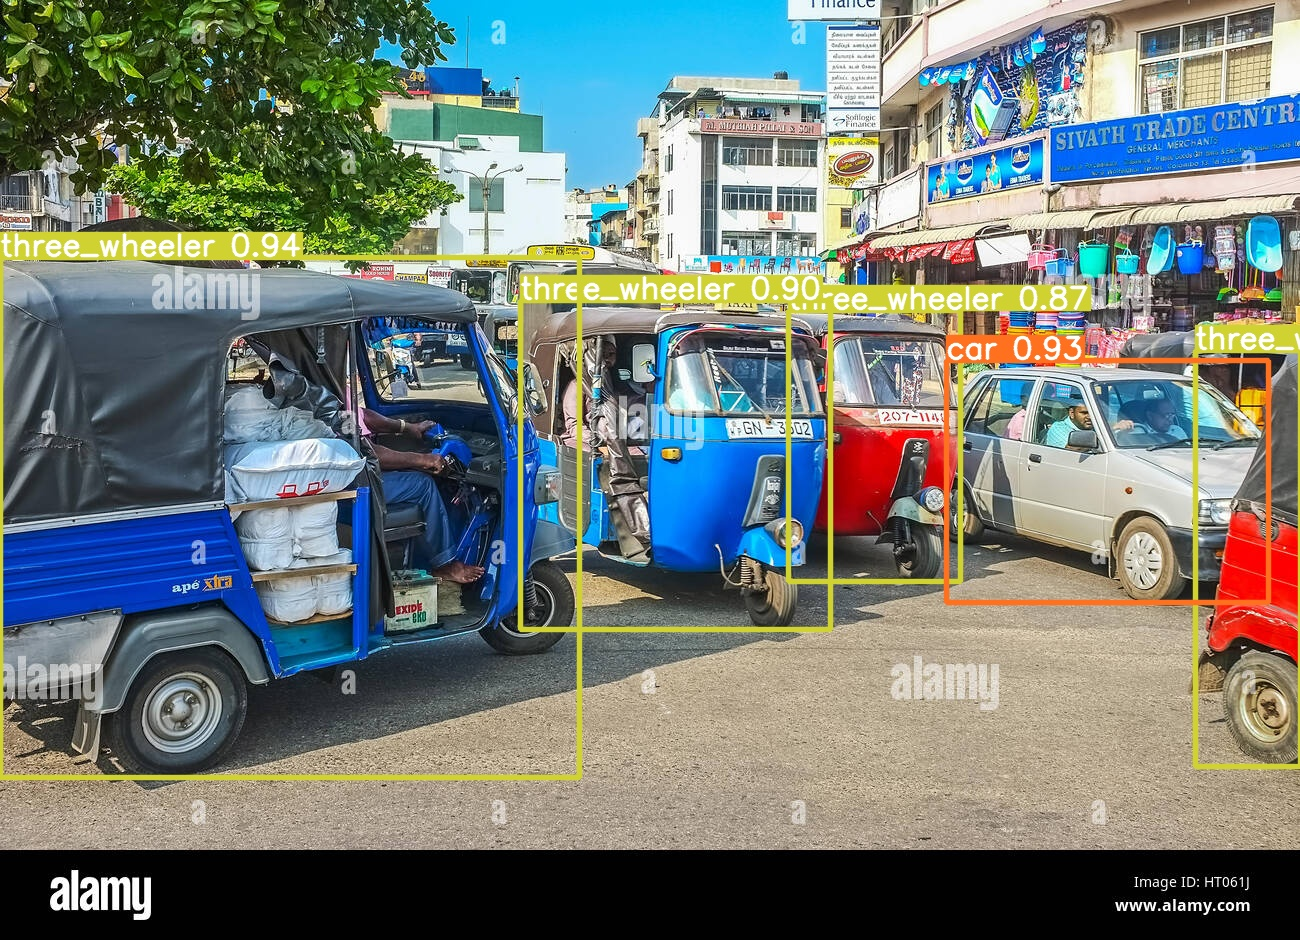


Detected 5 objects:
  - three_wheeler: 94.02%
  - car: 92.97%
  - three_wheeler: 90.41%
  - three_wheeler: 87.11%
  - three_wheeler: 79.73%


In [8]:
# Run inference on a test image
TEST_IMAGE = "test_images/colombo-sri-lanka-december-6-.jpg"  # Change this to your image path

results = best_model.predict(
    source=TEST_IMAGE,
    conf=0.5,
    save=True,
    project='inference_results',
    name='test',
    exist_ok=True
)

# Display results
output_path = f'inference_results/test/{os.path.basename(TEST_IMAGE)}'
if os.path.exists(output_path):
    print(f"\n✓ Inference complete!")
    display(Image(filename=output_path))
    
    # Print detections
    for r in results:
        if len(r.boxes) > 0:
            print(f"\nDetected {len(r.boxes)} objects:")
            for box in r.boxes:
                cls_id = int(box.cls[0])
                conf = float(box.conf[0])
                print(f"  - {best_model.names[cls_id]}: {conf:.2%}")
        else:
            print("No objects detected")
else:
    print(f"⚠️ Update TEST_IMAGE path to your actual test image")

## 8. View Training Results

Display training metrics and performance plots.

Training Results:


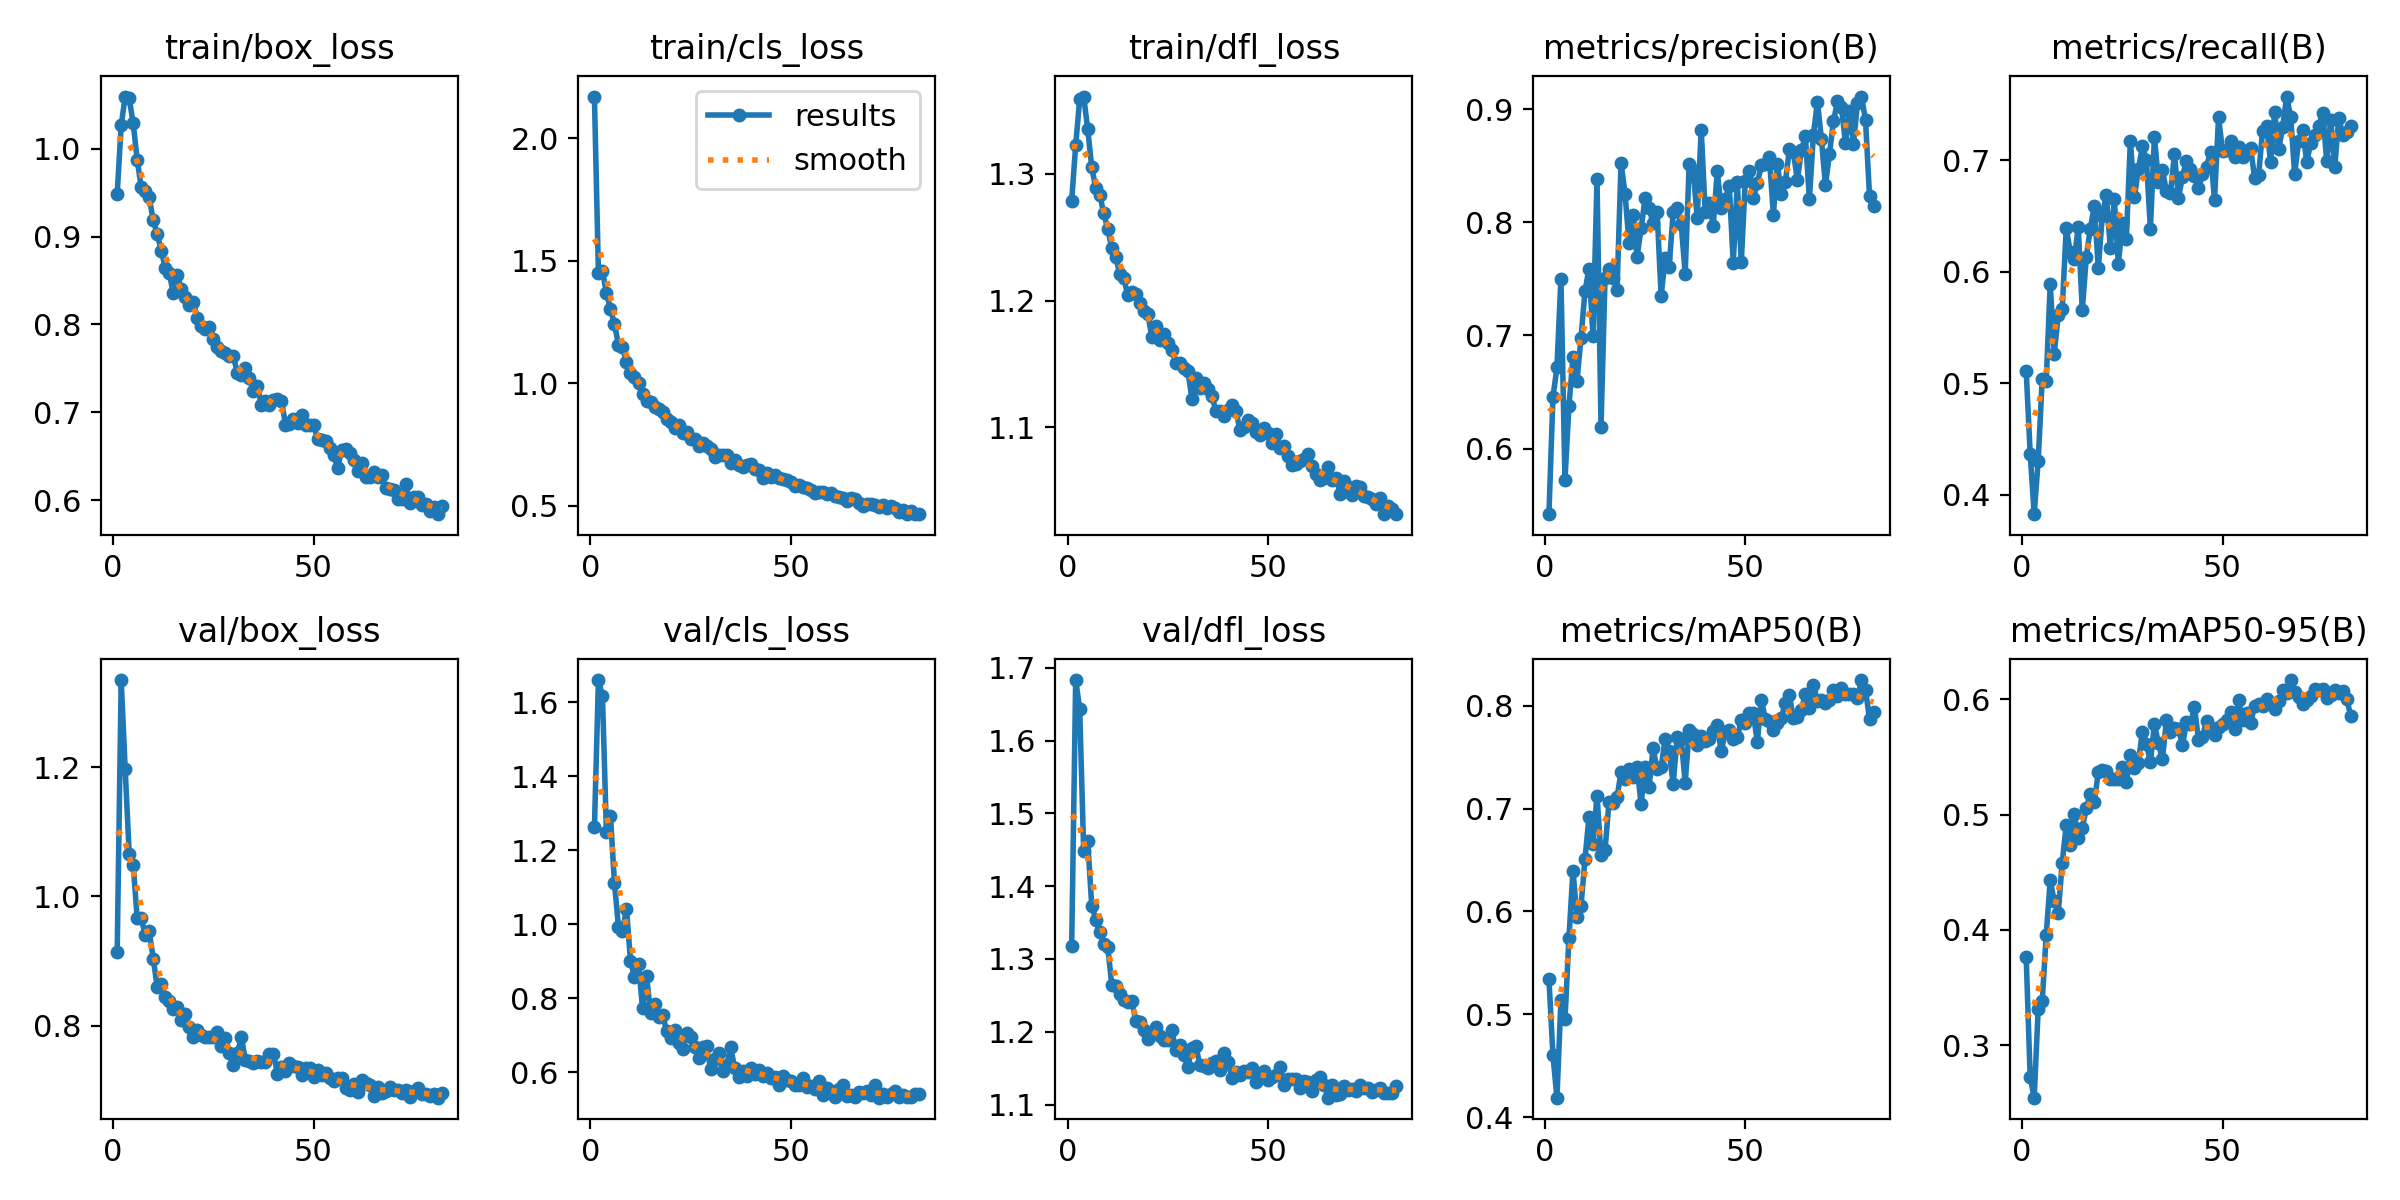


Confusion Matrix:


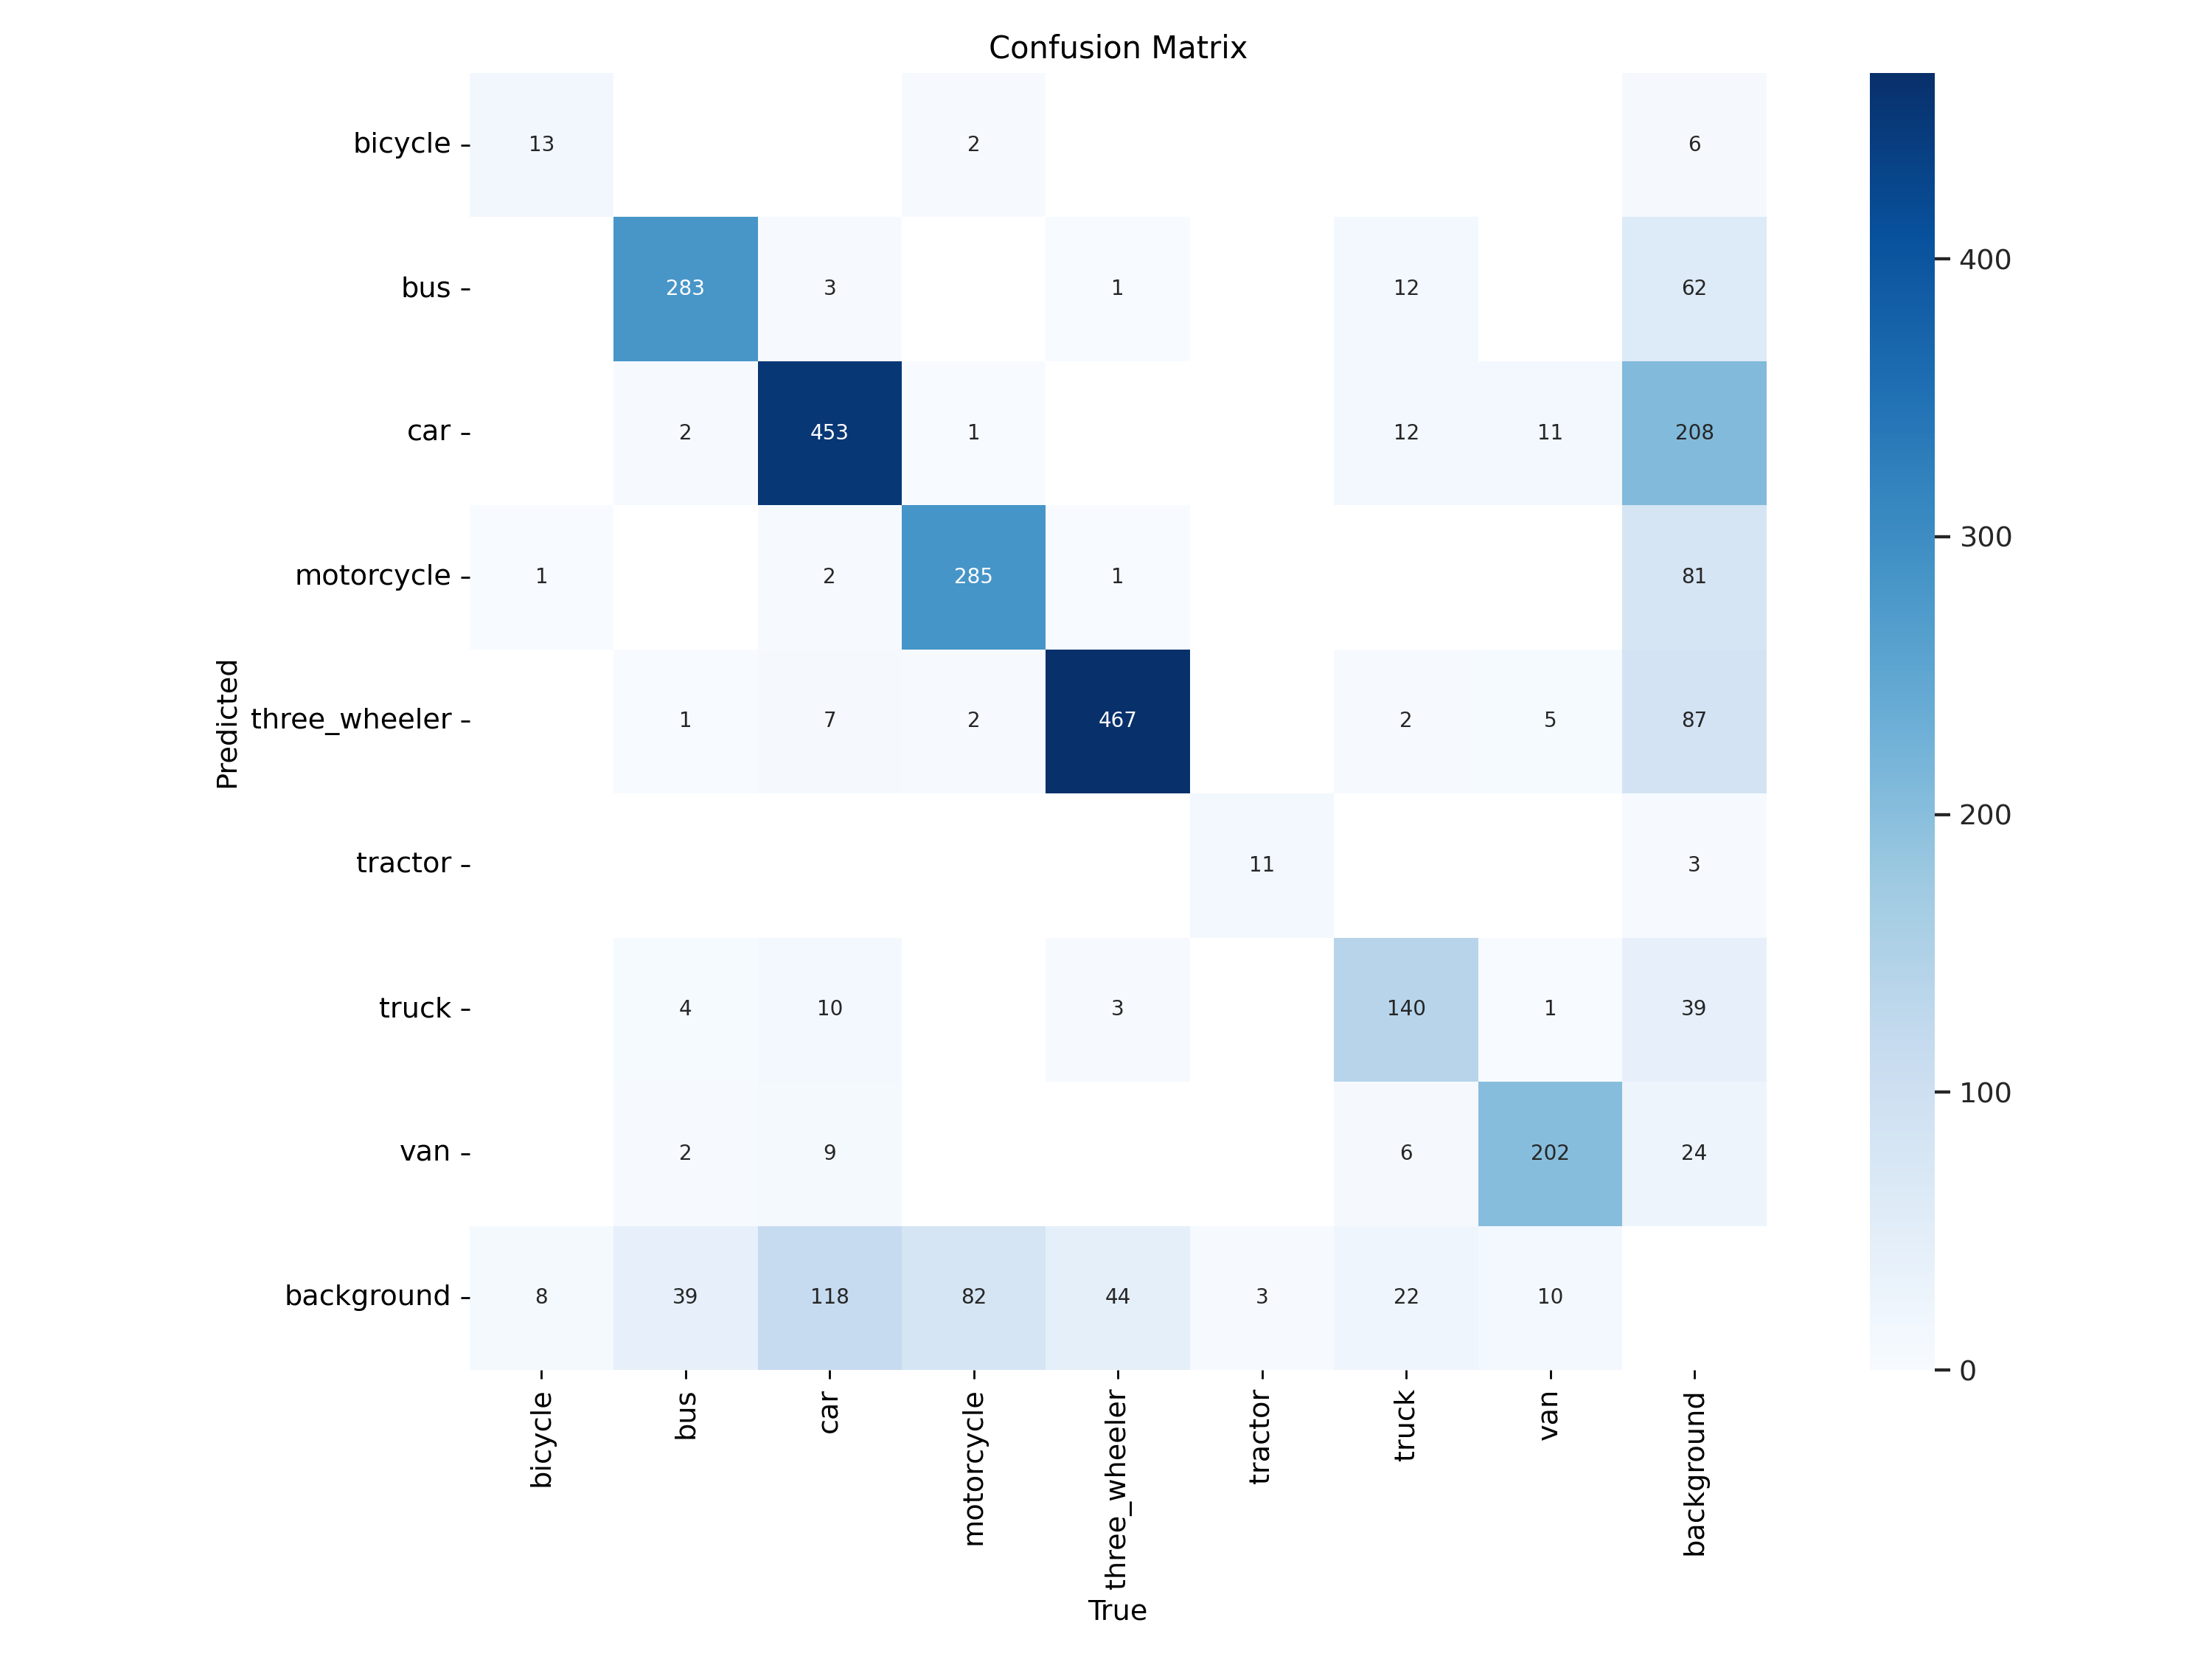

In [9]:
# Display training results
results_img = 'runs/detect/vehicle_detector3/results.png'
confusion_matrix = 'runs/detect/vehicle_detector3/confusion_matrix.png'

if os.path.exists(results_img):
    print("Training Results:")
    display(Image(filename=results_img))
    
if os.path.exists(confusion_matrix):
    print("\nConfusion Matrix:")
    display(Image(filename=confusion_matrix))

## 9. Batch Prediction (Optional)

Run predictions on multiple images or a folder.

In [9]:
# Predict on a folder of images
TEST_FOLDER = "test_images"

results = best_model.predict(
    source=TEST_FOLDER,
    conf=0.5,
    save=True,
    project='inference_results',
    name='batch_test'
)

print(f"✓ Processed {len(results)} images")
print(f"✓ Results saved to: inference_results/batch_test/")

print("⚠️ Uncomment the code above and set TEST_FOLDER to use batch prediction")

image 1/16 /home/ravindu/DeepVision/test_images/9Y1A8495_P18.jpg: 256x640 12 cars, 1 truck, 49.8ms
image 2/16 /home/ravindu/DeepVision/test_images/Car-99-_jpg.rf.5b3224bc8c17241ecb3cfc1ecc4f6293.jpg: 640x640 1 three_wheeler, 7.7ms
image 3/16 /home/ravindu/DeepVision/test_images/DSC_1819.jpg: 544x640 15 cars, 55.7ms
image 4/16 /home/ravindu/DeepVision/test_images/aerial-view-of-cars-waiting-for-green-light-at-a-junction-in-colombo-the-capital-city-of-sri-lanka-2JBCWXB.jpg: 640x480 2 buss, 9 cars, 2 motorcycles, 4 three_wheelers, 60.9ms
image 5/16 /home/ravindu/DeepVision/test_images/bus.jpg: 640x480 1 bus, 1 truck, 6.0ms
image 6/16 /home/ravindu/DeepVision/test_images/colombo-sri-lanka-december-6-.jpg: 480x640 1 car, 4 three_wheelers, 51.3ms
image 7/16 /home/ravindu/DeepVision/test_images/gettyimages-1645875672-612x612.jpg: 448x640 26 cars, 1 truck, 59.0ms
image 8/16 /home/ravindu/DeepVision/test_images/gettyimages-1645912653-1024x1024.jpg: 448x640 19 cars, 7.3ms
image 9/16 /home/ravind

✓ Processed 16 images
✓ Results saved to: inference_results/batch_test/
⚠️ Uncomment the code above and set TEST_FOLDER to use batch prediction


## 10. Export Model (Optional)

Export to different formats for deployment.

In [ ]:
# Export model to ONNX format (for production deployment)
# best_model.export(format='onnx')
# print("✓ Model exported to ONNX format")

# Other formats: 'torchscript', 'coreml', 'tflite', 'pb', 'engine' (TensorRT)

print(" Uncomment the code above to export  model")